In [1]:
%matplotlib inline
import openmc
from IPython.display import Image
from dagmc_geometry_slice_plotter import plot_axis_slice
import math

In [3]:
#materials

skin=openmc.Material(name='skin')
skin.add_element('H',10.0)
skin.add_element('C',19.9)
skin.add_element('N',4.2)
skin.add_element('O',65.0)
skin.add_element('Na',0.2)
skin.add_element('P',0.1)
skin.add_element('S',0.2)
skin.add_element('Cl',0.3)
skin.add_element('K',0.1)
skin.set_density('g/cm3', 1.089)
skin.id=5

skull=openmc.Material(name='skull')
skull.add_element('H',8.8)
skull.add_element('C',39.5)
skull.add_element('N',2.6)
skull.add_element('O',39.5)
skull.add_element('Na',0.1)
skull.add_element('Mg',0.1)
skull.add_element('P',2.8)
skull.add_element('S',0.2)
skull.add_element('Cl',0.1)
skull.add_element('K',0.1)
skull.add_element('Ca',6.2)
skull.set_density('g/cm3', 1.165)
skull.id=7

mandible=openmc.Material(name='mandible')
mandible.add_element('H',7.7)
mandible.add_element('C',33.2)
mandible.add_element('N',3.0)
mandible.add_element('O',42.0)
mandible.add_element('Na',0.2)
mandible.add_element('Mg',0.1)
mandible.add_element('P',4.1)
mandible.add_element('S',0.2)
mandible.add_element('Cl',0.1)
mandible.add_element('K',0.1)
mandible.add_element('Ca',9.3)
mandible.set_density('g/cm3',1.271)
mandible.id=8

somebones=openmc.Material(name='somebones')
somebones.add_element('H',9.6)
somebones.add_element('C',50.4)
somebones.add_element('N',1.7)
somebones.add_element('O',30.8)
somebones.add_element('Na',0.1)
somebones.add_element('P',2.2)
somebones.add_element('S',0.2)
somebones.add_element('Cl',0.1)
somebones.add_element('Ca',4.9)
somebones.set_density('g/cm3',1.109)
somebones.id=23

thoraicspine=openmc.Material(name='thoraicspine')
thoraicspine.add_element('H',10.0)
thoraicspine.add_element('C',40.3)
thoraicspine.add_element('N',2.8)
thoraicspine.add_element('O',43.1)
thoraicspine.add_element('Na',0.1)
thoraicspine.add_element('P',1.0)
thoraicspine.add_element('S',0.2)
thoraicspine.add_element('Cl',0.2)
thoraicspine.add_element('K',0.1)
thoraicspine.add_element('Ca',2.1)
thoraicspine.add_element('Fe',0.1)
thoraicspine.set_density('g/cm3',1.070)
thoraicspine.id=12

sacrum=openmc.Material(name='sacrum')
sacrum.add_element('H',10.5)
sacrum.add_element('C',42.6)
sacrum.add_element('N',2.7)
sacrum.add_element('O',42.6)
sacrum.add_element('Na',0.1)
sacrum.add_element('P',0.3)
sacrum.add_element('S',0.2)
sacrum.add_element('Cl',0.2)
sacrum.add_element('K',0.1)
sacrum.add_element('Ca',0.6)
sacrum.add_element('Fe',0.1)
sacrum.set_density('g/cm3',1.033)
sacrum.id=14

ribs=openmc.Material(name='ribs')
ribs.add_element('H',8.8)
ribs.add_element('C',34.6)
ribs.add_element('N',3.1)
ribs.add_element('O',44.4)
ribs.add_element('Na',0.1)
ribs.add_element('Mg',0.1)
ribs.add_element('P',2.6)
ribs.add_element('S',0.2)
ribs.add_element('Cl',0.1)
ribs.add_element('K',0.1)
ribs.add_element('Ca',5.8)
ribs.add_element('Fe',0.1)
ribs.set_density('g/cm3',1.170)
ribs.id=15

pelvis=openmc.Material(name='pelvis')
pelvis.add_element('H',9.4)
pelvis.add_element('C',40.9)
pelvis.add_element('N',2.6)
pelvis.add_element('O',40.0)
pelvis.add_element('Na',0.1)
pelvis.add_element('Mg',0.1)
pelvis.add_element('P',2.0)
pelvis.add_element('S',0.2)
pelvis.add_element('Cl',0.1)
pelvis.add_element('K',0.1)
pelvis.add_element('Ca',4.5)
pelvis.set_density('g/cm3',1.121)
pelvis.id=16

lumbarspine=openmc.Material(name='lumbarspine')
lumbarspine.add_element('H',9.5)
lumbarspine.add_element('C',38.0)
lumbarspine.add_element('N',3.0)
lumbarspine.add_element('O',43.6)
lumbarspine.add_element('Na',0.1)
lumbarspine.add_element('P',1.6)
lumbarspine.add_element('S',0.2)
lumbarspine.add_element('Cl',0.2)
lumbarspine.add_element('K',0.1)
lumbarspine.add_element('Ca',3.6)
lumbarspine.add_element('Fe',0.1)
lumbarspine.set_density('g/cm3',1.108)
lumbarspine.id=17

corticalbone=openmc.Material(name='corticalbone')
corticalbone.add_element('H',3.6)
corticalbone.add_element('C',15.9)
corticalbone.add_element('N',4.2)
corticalbone.add_element('O',44.8)
corticalbone.add_element('Na',0.3)
corticalbone.add_element('Mg',0.2)
corticalbone.add_element('P',9.4)
corticalbone.add_element('S',0.3)
corticalbone.add_element('Ca',21.3)
corticalbone.set_density('g/cm3',1.904)
corticalbone.id=18

clavicles=openmc.Material(name='clavicles')
clavicles.add_element('H',8.9)
clavicles.add_element('C',40.9)
clavicles.add_element('N',2.5)
clavicles.add_element('O',38.5)
clavicles.add_element('Na',0.1)
clavicles.add_element('P',2.7)
clavicles.add_element('S',0.2)
clavicles.add_element('Cl',0.1)
clavicles.add_element('K',0.1)
clavicles.add_element('Ca',6.0)
clavicles.set_density('g/cm3',1.157)
clavicles.id=20

cervicalspine=openmc.Material(name='cervicalspine')
cervicalspine.add_element('H',10.3)
cervicalspine.add_element('C',41.6)
cervicalspine.add_element('N',2.8)
cervicalspine.add_element('O',42.8)
cervicalspine.add_element('Na',0.1)
cervicalspine.add_element('P',0.6)
cervicalspine.add_element('S',0.2)
cervicalspine.add_element('Cl',0.2)
cervicalspine.add_element('K',0.1)
cervicalspine.add_element('Ca',1.2)
cervicalspine.add_element('Fe',0.1)
cervicalspine.set_density('g/cm3',1.049)
cervicalspine.id=21

cartilage=openmc.Material(name='cartilage')
cartilage.add_element('H',9.6)
cartilage.add_element('C',9.9)
cartilage.add_element('N',2.2)
cartilage.add_element('O',74.4)
cartilage.add_element('Na',0.5)
cartilage.add_element('P',2.2)
cartilage.add_element('S',0.9)
cartilage.add_element('Cl',0.3)
cartilage.set_density('g/cm3',1.099)
cartilage.id=22

materials=openmc.Materials([skin, skull, mandible, somebones, thoraicspine, sacrum, ribs, pelvis, lumbarspine, corticalbone,
                           clavicles, cervicalspine, cartilage])
materials.export_to_xml()
!cat materials.xml

/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=5.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=7.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=8.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=16.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=17.
  warn(msg, IDWarning)
/home/krislinsartakov/.local/lib/python3.8/site-packages/openmc/mixin.py:70: IDWarning: Another Material instance already exists with id=18.
  warn(msg, IDWarning)
/home/krislinsartak

<?xml version='1.0' encoding='utf-8'?>
<materials>
  <material id="5" name="skin">
    <density units="g/cm3" value="1.089" />
    <nuclide ao="9.9984426" name="H1" />
    <nuclide ao="0.0015574" name="H2" />
    <nuclide ao="19.679547799999998" name="C12" />
    <nuclide ao="0.22045219999999996" name="C13" />
    <nuclide ao="4.1846154" name="N14" />
    <nuclide ao="0.0153846" name="N15" />
    <nuclide ao="64.845339" name="O16" />
    <nuclide ao="0.024635" name="O17" />
    <nuclide ao="0.130026" name="O18" />
    <nuclide ao="0.2" name="Na23" />
    <nuclide ao="0.1" name="P31" />
    <nuclide ao="0.19008148000000002" name="S32" />
    <nuclide ao="0.0014973800000000002" name="S33" />
    <nuclide ao="0.00839198" name="S34" />
    <nuclide ao="2.916e-05" name="S36" />
    <nuclide ao="0.22729409999999997" name="Cl35" />
    <nuclide ao="0.0727059" name="Cl37" />
    <nuclide ao="0.09325810000000001" name="K39" />
    <nuclide ao="1.17e-05" name="K40" />
    <nuclide ao="0.0067302"

In [4]:
#geometry
dagmc_univ=openmc.DAGMCUniverse(filename='ssb.h5m').bounded_universe()
geometry=openmc.Geometry(root=dagmc_univ)
geometry.export_to_xml()
!cat geometry.xml

<?xml version='1.0' encoding='utf-8'?>
<geometry>
  <cell fill="1" id="10000" region="10000 -10001 10002 -10003 10004 -10005" universe="2" />
  <dagmc_universe filename="ssb.h5m" id="1" />
  <surface boundary="vacuum" coeffs="-30.130590820312502" id="10000" type="x-plane" />
  <surface boundary="vacuum" coeffs="28.428750000000004" id="10001" type="x-plane" />
  <surface boundary="vacuum" coeffs="-14.2829408203125" id="10002" type="y-plane" />
  <surface boundary="vacuum" coeffs="16.299360205078127" id="10003" type="y-plane" />
  <surface boundary="vacuum" coeffs="-92.25320507812502" id="10004" type="z-plane" />
  <surface boundary="vacuum" coeffs="92.55172500000002" id="10005" type="z-plane" />
</geometry>


![Mesh](ssb.png)

![Bones](sab.PNG)

![Bones](snb.PNG)

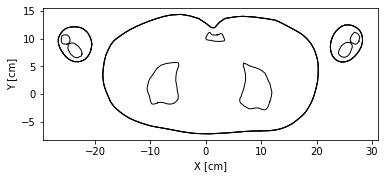

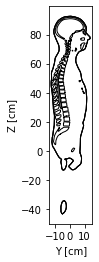

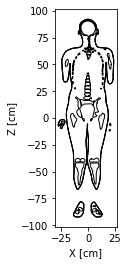

In [5]:
#plotting
plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='ssb.h5m',
    view_direction='z',
)

plot.show()

plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='ssb.h5m',
    view_direction='x',
)

plot.show()

plot = plot_axis_slice(
    dagmc_file_or_trimesh_object='ssb.h5m',
    view_direction='y',
)

plot.show()

In [6]:
#point source
point=openmc.stats.Point((0,0,80))
source=openmc.Source(space=point)

source.energy = openmc.stats.Discrete([1e6], [1])
source.particle = 'photon'

In [7]:
#settings
settings=openmc.Settings()
settings.source=source
settings.batches=100
settings.inactive=10
settings.particles=5000

settings.run_mode = "fixed source"

settings.export_to_xml()
!cat settings.xml

<?xml version='1.0' encoding='utf-8'?>
<settings>
  <run_mode>fixed source</run_mode>
  <particles>5000</particles>
  <batches>100</batches>
  <inactive>10</inactive>
  <source particle="photon" strength="1.0">
    <space type="point">
      <parameters>0 0 80</parameters>
    </space>
    <energy type="discrete">
      <parameters>1000000.0 1.0</parameters>
    </energy>
  </source>
</settings>


In [8]:
#tallies
energy_bins_p, dose_coeffs_p = openmc.data.dose_coefficients(particle='photon', geometry='AP')

energy_function_filter_p = openmc.EnergyFunctionFilter(energy_bins_p, dose_coeffs_p)
energy_function_filter_p.interpolation == 'cubic'

photon_particle_filter = openmc.ParticleFilter(["photon"])
surface_filter=openmc.SurfaceFilter(39) #check the surface ID in cubit

dose_tally = openmc.Tally(name="dose_tally_on_surface")
dose_tally.scores = ["current"]
dose_tally.filters = [
    surface_filter,
    photon_particle_filter,
    energy_function_filter_p,
]
my_tallies = openmc.Tallies([dose_tally])
my_tallies.export_to_xml()

In [9]:
#running the model
openmc.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

In [10]:
#post-processing
sp=openmc.StatePoint('statepoint.100.h5')

tally=sp.get_tally(name='dose_tally_on_surface')
df=tally.get_pandas_dataframe()

tally_result=df['mean'].sum()
tally_std_dev=df['std. dev.'].sum()

dose_in_pSv=tally_result/(82318.6)#get surface area from cubit

source_activity=5000
emission_rate=2 #from example, might not be correct
gamma_per_second=source_activity*emission_rate
dose_rate_in_pSv=dose_in_pSv*gamma_per_second

print('The surface dose = ', dose_rate_in_pSv, 'pSv per sec')

The surface dose =  0.03670338999458702 pSv per sec
